In [1]:
import numpy as np
import pandas as pd
import panel as pn
import datashader as ds
from numba import jit
from datashader import transfer_functions as tf

In [2]:
# Hopalong Attractor
@jit(nopython=True)
def Attractor_Calc(x0, y0, n, a, b, c):
    
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    
    for i in np.arange(n-1):
        x[i+1] = y[i] - np.sqrt(abs(b * x[i] - c)) * np.sign(x[i])
        y[i+1] = a - x[i]
        
    return x, y

In [9]:
def Attractor_Plot(n=10000000, a=1.0, b=2.0, c=6.6, cmap=["gold", "purple"]):
    
    x0, y0 = 0.0, 0.0
    cvs = ds.Canvas(plot_width=700, plot_height=700)
    
    x, y = Attractor_Calc(x0, y0, n, a, b, c)
    agg = cvs.points(pd.DataFrame({"x":x, "y":y}), "x", "y")
    
    return tf.shade(agg, cmap)

Column
    [0] Column
        [0] IntSlider(end=10000000, name='n', start=1, value=10000000)
        [1] FloatSlider(end=3.0, name='a', start=-1.0, value=1.0)
        [2] FloatSlider(end=6.0, name='b', start=-2.0, value=2.0)
        [3] FloatSlider(end=19.799999999999997, name='c', start=-6.6, value=6.6)
    [1] Row
        [0] PNG(Image, name='interactive00054')
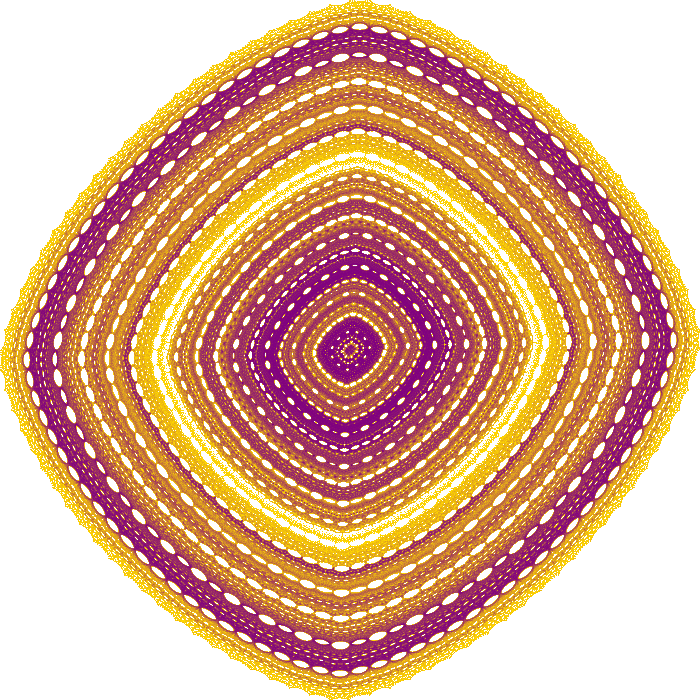

In [10]:
pn.extension()
pn.interact(Attractor_Plot, n=(1, 10000000))